# Reading Data from a File
In the previous tutorial we graphed arrays of data, where we manually or mathematically filled the arrays. In some cases, we collect data into a local file and then later want to import that data into a Jupyter notebook. 

In this tutorial, we will learn to import data from a file using a library called `pandas`. We will see how to load files in four different ways.

1. Read local files on your computer
    * Read a delimited file called comma-separated values (.csv file)
    * Read an Excel file (.xlsx)
2. Read files from the web (url)
3. Upload a file using Google's Colaboratory

The first two methods work for a locally installed version of Jupyter such as Anaconda. The second and third methods work for the web-based Jupyter that is run by Google (https://colab.research.google.com/)

## Filetypes
### Comma-Separated Values (csv)
In data collection and analysis, we are often confronted with files of different types. A common file output from a scientific instrument is a tab or comma-separated lists of data. We will look at the comma-separated variety. In a csv file, there may be as many columns as you wish that are all separated by commas. For example, a file might look like the following.

Voltage,Current

1.00,5.01

2.00,10.10

3.00,14.93

4.00,20.27

5.00,24.98

This data can be downloaded from https://github.com/troymessina/ModernPhysics/blob/master/data/example.csv. Right-click and save this file to the same folder where this Jupyter notebook is saved. You may open it to see that it looks like above.

## Pandas
Pandas is a very powerful data handling library. We will use only very few of its capabilities. To import Pandas, use the following statement. This will make Pandas functionality available through `pd.*` syntax.

```python
import pandas as pd
```

In [1]:
import pandas as pd

## Load a Local File
Once you have imported the Pandas library, we can load the data into what is called a dataframe. A dataframe can handle many different structures of data. We will focus on numerical data with titles for each different list or array of data. To load a csv file into a dataframe use the following command.

```python
df = pd.read_csv('example.csv')
```

It's a good idea to use more meaningful dataframe names than `df`.

In [9]:
example_csv=pd.read_csv('example.csv')

This will create a dataframe named `df`. In it are two columns titled "Voltage" and "Current". You can imagine something like the following table, where the first column is the row index starting with zero and the first row is the the title of each column. These first row and column are used for indexing the dataframe similar to how we indexed the `numpy` arrays in a previous exercise.

|| Voltage  | Current |
|---|---|---|
| 0  | 1.00 | 5.01  |
| 1  | 2.00 | 10.10  |
| 2  | 3.00 | 14.93  |
| 3  | 4.00 | 20.27  |
| 4  | 5.00 | 24.98  |

You can see the dataframe by printing it

```python
df.head()
```

You can also get a list of column names

```python
# iterating the columns 
for col in df.columns: 
    print(col) 
```

In [10]:
example_csv.head()

,Voltage,Current
0,1,5.01
1,2,10.10
2,3,14.93
3,4,20.27
4,5,24.98


In [11]:
# iterating the columns 
for col in example_csv.columns: 
    print(col) 

Voltage
Current


## Plot the Data
Once data is loaded, it can be plotted using `matplotlib`. The beautiful thing about `pandas` is that we can reference the arrays by name. For example, importing `matplotlib` and plotting current vs. voltage might look like the following.

```python
import matplotlib.pyplot as plt

plt.plot(df['Voltage'], df['Current'], 'rs', label='Data')
plt.grid(True)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=0)
plt.show()
```

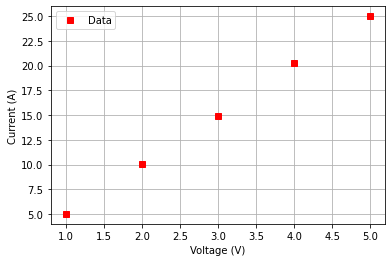

In [12]:
import matplotlib.pyplot as plt

plt.plot(example_csv['Voltage'], example_csv['Current'], 'rs', label='Data')
plt.grid(True)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=0)
plt.show()

## Load a File from URL
We can load files from the web as long as we have a URL to the file. This can be useful if we are using Google's Colaboratory instead of an Jupyter installation on our computer. It can also be useful if you store data somewhere like GitHub (https://github.com/), which is a website for keeping up with computer coding projects. It's free!

Suppose we want to load the file you just download, but without downloading it. You could do the following.

```python
df = pd.read_csv('https://raw.githubusercontent.com/troymessina/ModernPhysics/master/data/example.csv')
```

Notice, I had to go to GitHub and get a "raw" address to the file. It is always a good idea to check that it loaded by running the `head` command.

```python
df.head()
```

In [15]:
example_csv_from_url = pd.read_csv('https://raw.githubusercontent.com/troymessina/ModernPhysics/master/data/example.csv')
example_csv_from_url.head()

,Voltage,Current
0,1.0,5.01
1,2.0,10.10
2,3.0,14.93
3,4.0,20.27
4,5.0,24.98


## Load Data from an Excel File
This process is virtually the same as the csv file, except Excel files can store much more data using separate sheets. We can load individual sheets into separate dataframes. Right click and save the target Excel file in the following link to the same directory where this Jupyter notebook is saved. Open the Excel file and see that it has two sheets of data. To load the Excel file by sheet, one would use a command like the following.

```python
df = pd.read_excel('filename.xlsx', 'sheet name', index_col=None, na_values=['NA'])
```

The flag `index_col` tells Pandas that there is not a beginning column in the file that indexes the rows. The `na_values` tells Pandas how to deal with Excel cells that are Not A Number (NAN). Try loading each sheet into two different dataframes.

In [20]:
first_run = pd.read_excel('Results.xlsx', 'First Run', index_col=None, na_values=['NA'])
second_run = pd.read_excel('Results.xlsx', 'Second Run', index_col=None, na_values=['NA'])

first_run.head()
#second_run.head()

,x,y
0,0.1,0.04998
1,0.2,0.21364
2,0.3,0.41454
3,0.4,0.84672
4,0.5,1.17600


### Plot the Excel Data
Try plotting the Excel data with both sheets' data on the same graph with different marker colors and shapes. Do not use a connecting line between the markers. Label the axes. Label the data based on the sheet names, and be sure to show a legend.

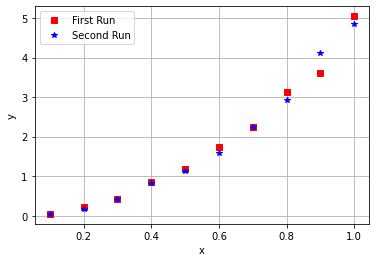

In [21]:
plt.plot(first_run['x'], first_run['y'], 'rs', label='First Run')
plt.plot(second_run['x'], second_run['y'], 'b*', label='Second Run')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0)
plt.show()

## Google Colaboratory
This method ONLY works in the web-based Google Colaboratory. It will not work in a locally installed Jupyter environment.


In [ ]:
from google.colab import files
uploaded = files.upload()

The previous code will create a pop-up so you can search for a local file to upload. Once uploaded you can use the method 1 that were used for local files. For example, if you upload a file named `filename.csv`, you would use pandas in the following way.

In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['filename.csv'].decode('utf-8')))